In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Load the data
data = pd.read_csv("college.csv")
data.head()

,College.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [18]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   College.Name  777 non-null    object 
 1   Private       777 non-null    object 
 2   Apps          777 non-null    int64  
 3   Accept        777 non-null    int64  
 4   Enroll        777 non-null    int64  
 5   Top10perc     777 non-null    int64  
 6   Top25perc     777 non-null    int64  
 7   F.Undergrad   777 non-null    int64  
 8   P.Undergrad   777 non-null    int64  
 9   Outstate      777 non-null    int64  
 10  Room.Board    777 non-null    int64  
 11  Books         777 non-null    int64  
 12  Personal      777 non-null    int64  
 13  PhD           777 non-null    int64  
 14  Terminal      777 non-null    int64  
 15  S.F.Ratio     777 non-null    float64
 16  perc.alumni   777 non-null    int64  
 17  Expend        777 non-null    int64  
 18  Grad.Rate     777 non-null    

In [19]:
# Statistical summary
data.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [20]:
# Missing values
data.isnull().sum()

College.Name    0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD             0
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

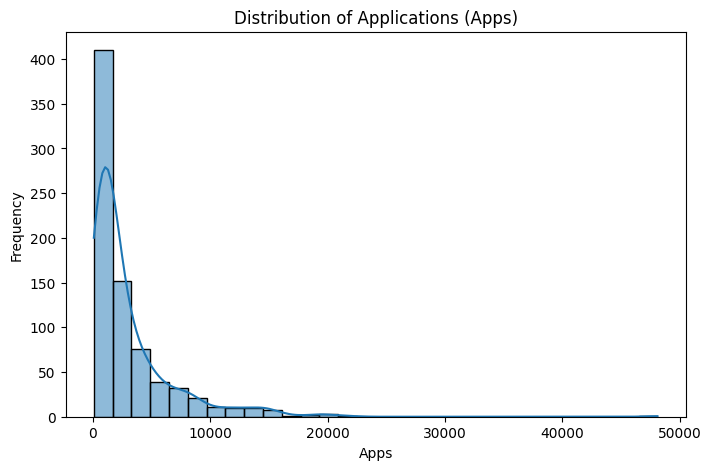

In [21]:
# Histogram of Apps
plt.figure(figsize=(8,5))
sns.histplot(data['Apps'], bins=30, kde=True)
plt.title("Distribution of Applications (Apps)")
plt.xlabel("Apps")
plt.ylabel("Frequency")
plt.show()

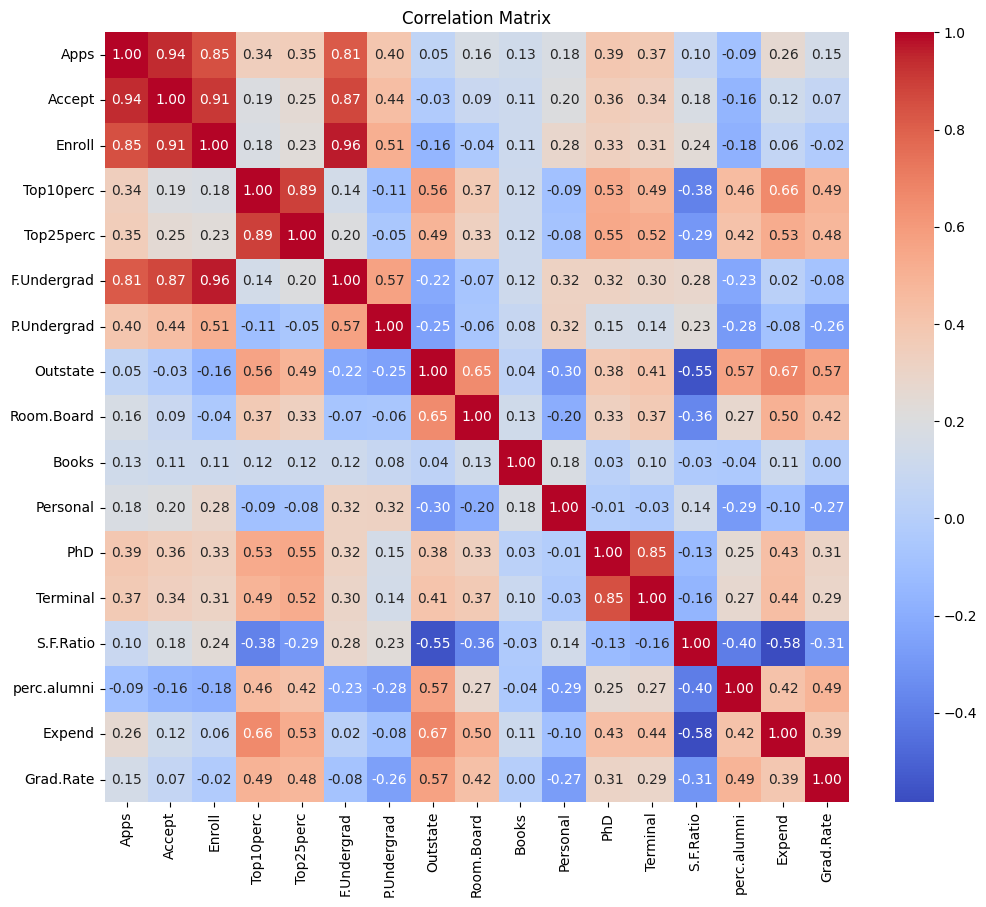

In [24]:
# Correlation heatmap
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(12,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


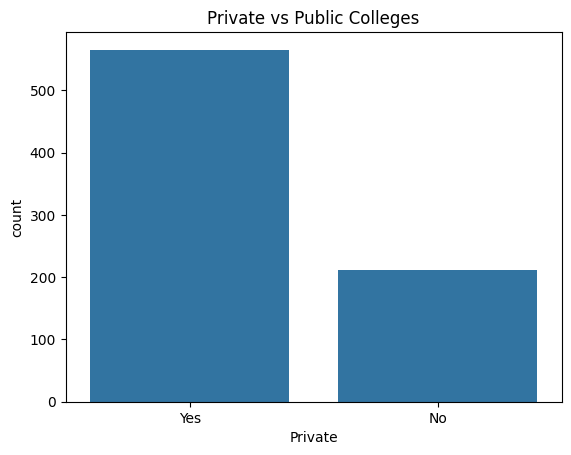

In [25]:
# Count of Private vs Public Colleges
sns.countplot(x='Private', data=data)
plt.title("Private vs Public Colleges")
plt.show()

In [26]:
# Encode 'Private' column
le = LabelEncoder()
data['Private'] = le.fit_transform(data['Private'])  # Yes=1, No=0

# Features and target
X = data.drop(['Apps','College.Name'], axis=1)
y = data['Apps']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

Linear Regression Results:
MSE: 1492443.38, MAE: 744.86, R2: 0.89

Random Forest Results:
MSE: 1029753.23, MAE: 591.57, R2: 0.92



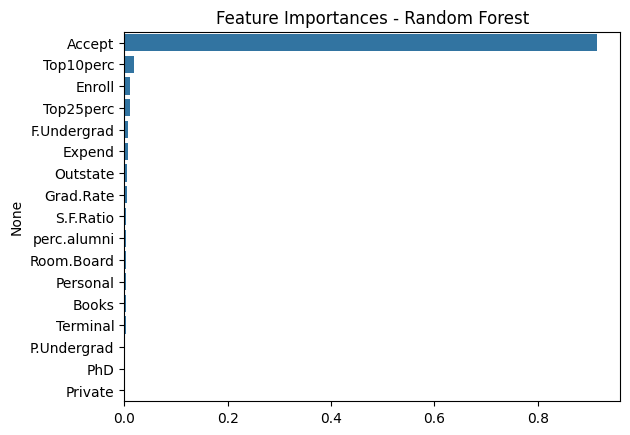

Gradient Boosting Results:
MSE: 1316452.54, MAE: 582.13, R2: 0.90



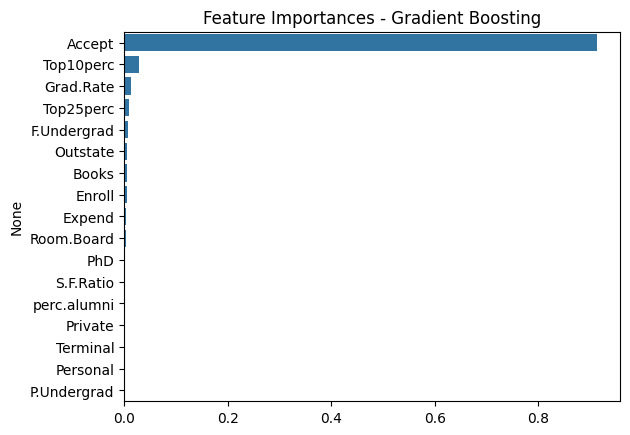

In [28]:
# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Results:\nMSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}\n")
    
    # Feature importance for tree-based models
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        sns.barplot(x=importances.values, y=importances.index)
        plt.title(f"Feature Importances - {name}")
        plt.show()

In [30]:
#sample prediction
sample = X_test_scaled[0].reshape(1, -1)
for name, model in models.items():
    pred = model.predict(sample)[0]
    print(f"{name} prediction: {pred:.0f}")
print(f"Actual: {y_test.iloc[0]}")

Linear Regression prediction: 4222
Random Forest prediction: 3863
Gradient Boosting prediction: 4321
Actual: 4877


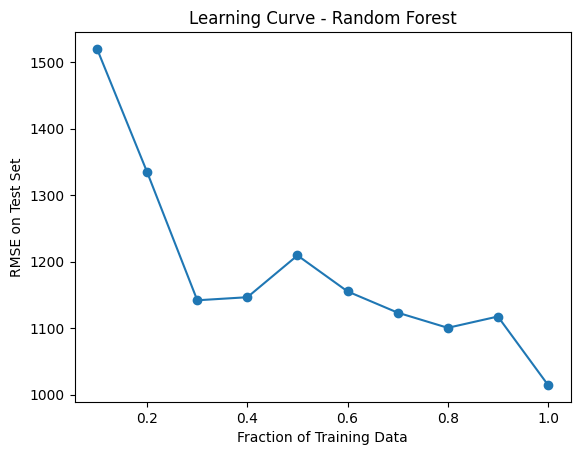

In [34]:
# Track RMSE as training size increases
fractions = np.linspace(0.1, 1.0, 10)
rmse_list = []

for frac in fractions:
    n = int(frac * len(X_train_scaled))
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled[:n], y_train[:n])
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

plt.plot(fractions, rmse_list, marker='o')
plt.xlabel("Fraction of Training Data")
plt.ylabel("RMSE on Test Set")
plt.title("Learning Curve - Random Forest")
plt.show()